# Convolutional Neural Networks (CNN) for Image Classification

In this notebook, we will explore **Convolutional Neural Networks (CNNs)**, which are the backbone of most modern computer vision tasks.  
We will implement a CNN using **TensorFlow/Keras** and train it on the **CIFAR-10 dataset**, which consists of 60,000 32x32 color images across 10 classes.


## What is a CNN?

A Convolutional Neural Network (CNN) is a type of deep neural network designed for processing **grid-like data**, such as images.  
It consists of three main types of layers:

1. **Convolutional Layers (Conv2D)** – Extract features from the input image using filters.
2. **Pooling Layers (MaxPooling2D / AveragePooling2D)** – Reduce the spatial dimensions to decrease computational cost and retain important features.
3. **Fully Connected Layers (Dense)** – Flatten the features and perform classification.

Other key components:
- **Activation Functions**: ReLU, Softmax
- **Dropout**: Regularization to prevent overfitting

## Import Required Libraries

In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


## Load CIFAR-10 Dataset

CIFAR-10 has 60,000 images (32x32x3) in 10 classes:
- airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

We will load the dataset and split it into **training** and **testing** sets.


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Dataset shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## Visualize Some Images

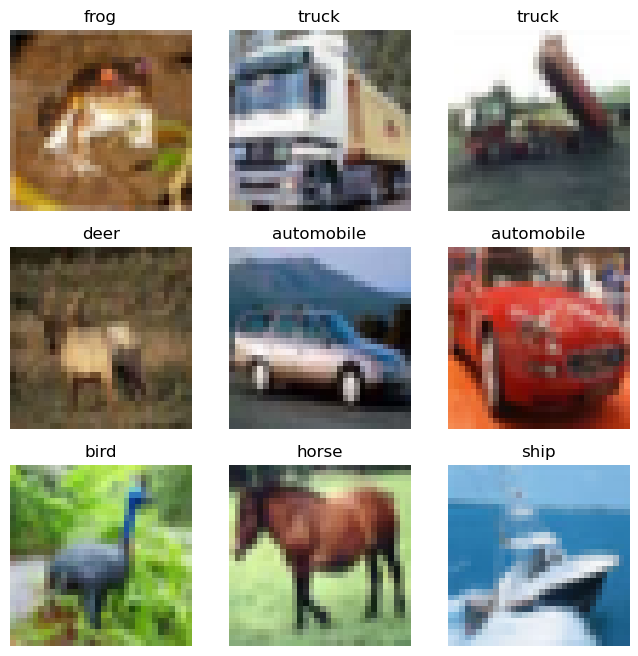

In [3]:
# Define class labels
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Plot first 9 images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()


## Build CNN Architecture

Architecture:
1. Conv2D -> 32 filters, kernel 3x3, ReLU  
2. MaxPooling2D -> 2x2  
3. Conv2D -> 64 filters, kernel 3x3, ReLU  
4. MaxPooling2D -> 2x2  
5. Flatten  
6. Dense -> 128 neurons, ReLU  
7. Dropout -> 0.5  
8. Dense -> 10 neurons (Softmax) for classification


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\ksiri\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Train the CNN

We will train the model for **10 epochs** with batch size **64**.


In [5]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.3666 - loss: 1.7309 - val_accuracy: 0.5107 - val_loss: 1.3939
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4904 - loss: 1.4134 - val_accuracy: 0.5717 - val_loss: 1.2246
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5454 - loss: 1.2749 - val_accuracy: 0.5995 - val_loss: 1.1576
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.5777 - loss: 1.1883 - val_accuracy: 0.6142 - val_loss: 1.0977
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6010 - loss: 1.1257 - val_accuracy: 0.6344 - val_loss: 1.0479
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6198 - loss: 1.0727 - val_accuracy: 0.6429 - val_loss: 1.0244
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6371 - loss: 1.0332 - val_accuracy: 0.6404 - val_loss: 1.0216
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6504 - loss: 0.9930 - 

## Evaluate Model on Test Data

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6718 - loss: 0.9378
Test Accuracy: 0.6718000173568726


## Training & Validation Accuracy/Loss

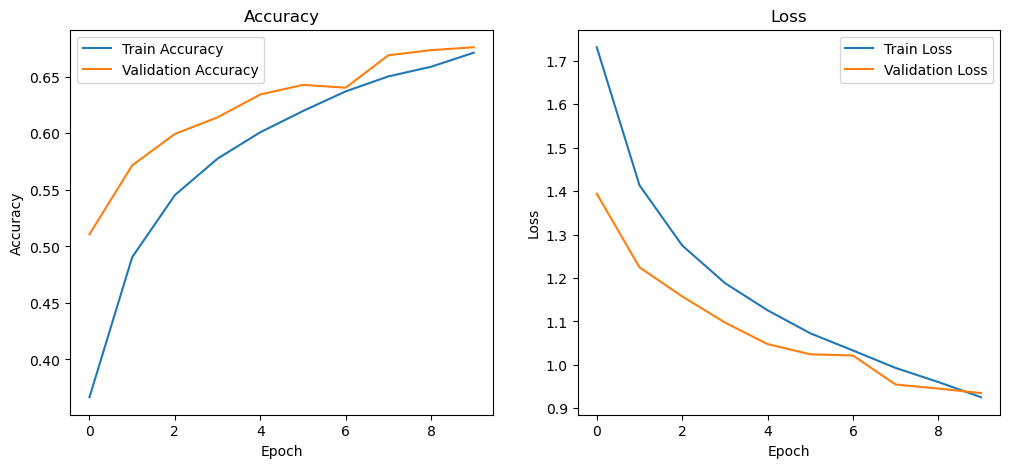

In [7]:
# Plot accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Make Predictions

Let's predict on test images and visualize some results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


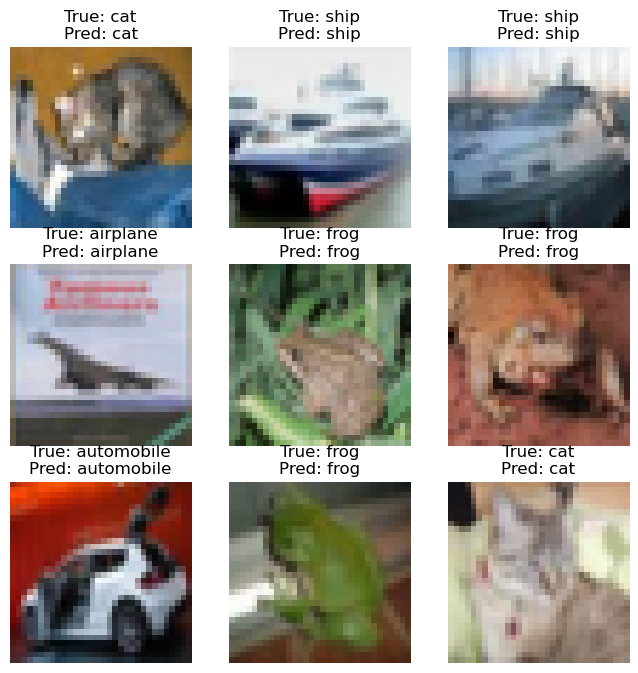

In [8]:
# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Plot first 9 predictions
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_true_classes[i]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.show()


## Key Takeaways

- CNNs automatically learn features from images using convolution and pooling layers.
- Deeper networks and transfer learning improve performance on complex datasets.
- Dropout and normalization prevent overfitting.
- CNNs are widely used in image classification, object detection, and segmentation tasks.

Next steps:
- Experiment with **data augmentation** to improve generalization.
- Fine-tune **pretrained models** like ResNet, VGG, InceptionNet.
- Explore **Advanced architectures**: ResNet, DenseNet, EfficientNet.
